In [1]:
#first read the data and analyze it 


import pandas as pd
import matplotlib as mt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
male_data = pd.read_csv('Data/male.csv')
female_data = pd.read_csv('Data/female.csv')

In [3]:
male_data.info()
female_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, subjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB


In [4]:
# Generally, men's shoulder widths range from 16 to 20 inches (40–50 cm), while women's shoulder widths range from 14 to 18 inches (30–40 cm). 
#Chest size is usually measured as a circumference (girth) around the chest.  Small (S): ~36 inches. Medium (M): Often 38–40 inches. Large (L): Often 42–44 inches. Extra-Large/Big (XL+): Generally above 46 inches. 
#so we need to clean the data  mm->cm divide/10

female_data['biacromialbreadth'] = female_data['biacromialbreadth'] / 10
female_data['chestcircumference'] = female_data['chestcircumference'] / 10

male_data['biacromialbreadth'] = male_data['biacromialbreadth'] / 10
male_data['chestcircumference'] = male_data['chestcircumference'] / 10


In [5]:
#exporting 2 colums to fresh csv 


male_data[['biacromialbreadth','chestcircumference']].to_csv('Data/male_measurments.csv')
female_data[['biacromialbreadth','chestcircumference']].to_csv('Data/female_measurments.csv')

In [6]:
female_data.isnull().sum()

subjectId                         0
abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
                                 ..
DODRace                           0
Age                               0
Heightin                          0
Weightlbs                         0
WritingPreference                 0
Length: 108, dtype: int64

In [7]:
#precentile of data 

def percentile_ranges(column):
    ranges = [(0, 5), (5, 25), (25, 50), (50, 75), (75, 90), (90, 97), (97, 100)]
    percentiles ={(low,high): (column.quantile(low/100) , column.quantile(high/100)) for low,high in ranges}

    counts ={}

    for r, (low,high) in percentiles.items():
        counts[r] =((column >=low) & (column < high)).sum()
    return counts

print(percentile_ranges(female_data['chestcircumference']))
print(percentile_ranges(female_data['biacromialbreadth']))

print(percentile_ranges(male_data['chestcircumference']))
print(percentile_ranges(male_data['biacromialbreadth']))


{(0, 5): np.int64(100), (5, 25): np.int64(396), (25, 50): np.int64(492), (50, 75): np.int64(499), (75, 90): np.int64(299), (90, 97): np.int64(140), (97, 100): np.int64(59)}
{(0, 5): np.int64(93), (5, 25): np.int64(377), (25, 50): np.int64(477), (50, 75): np.int64(541), (75, 90): np.int64(297), (90, 97): np.int64(139), (97, 100): np.int64(61)}
{(0, 5): np.int64(199), (5, 25): np.int64(810), (25, 50): np.int64(1025), (50, 75): np.int64(1012), (75, 90): np.int64(616), (90, 97): np.int64(295), (97, 100): np.int64(124)}
{(0, 5): np.int64(191), (5, 25): np.int64(787), (25, 50): np.int64(989), (50, 75): np.int64(1079), (75, 90): np.int64(610), (90, 97): np.int64(303), (97, 100): np.int64(122)}


In [8]:
#generate t-shirt Chart 


def measurements(data,chest,shoulder):
    sizes = ['XS', 'S', 'M', 'L', 'XL', '2XL', '3XL']
    ranges = [0, 5, 25 , 50, 75, 90, 97]

    chest_percentile = {p : data[chest].quantile(p/100) for p in ranges}
    shoulder_percentile = {p : data[shoulder].quantile(p/100) for p in ranges}


    # Map the t-shirt sizes to the corresponding chest and shoulder measurements
    size_mappings = {}
    for i, size in enumerate(sizes):
        size_mappings[size] = {
            'Chest': int(chest_percentile[ranges[i]]),
            'Shoulder': int(shoulder_percentile[ranges[i]])
        }
    
    return size_mappings


print(measurements(female_data, 'chestcircumference', 'biacromialbreadth'))
print(measurements(male_data, 'chestcircumference', 'biacromialbreadth'))




{'XS': {'Chest': 69, 'Shoulder': 28}, 'S': {'Chest': 82, 'Shoulder': 33}, 'M': {'Chest': 88, 'Shoulder': 35}, 'L': {'Chest': 94, 'Shoulder': 36}, 'XL': {'Chest': 99, 'Shoulder': 37}, '2XL': {'Chest': 105, 'Shoulder': 38}, '3XL': {'Chest': 111, 'Shoulder': 40}}
{'XS': {'Chest': 77, 'Shoulder': 33}, 'S': {'Chest': 92, 'Shoulder': 38}, 'M': {'Chest': 99, 'Shoulder': 40}, 'L': {'Chest': 105, 'Shoulder': 41}, 'XL': {'Chest': 111, 'Shoulder': 42}, '2XL': {'Chest': 117, 'Shoulder': 44}, '3XL': {'Chest': 123, 'Shoulder': 45}}


In [9]:
# Female size chart
female_size_chart = measurements(
    female_data, 'chestcircumference', 'biacromialbreadth'
)

# Male size chart
male_size_chart = measurements(
    male_data, 'chestcircumference', 'biacromialbreadth'
)

print(female_size_chart)


{'XS': {'Chest': 69, 'Shoulder': 28}, 'S': {'Chest': 82, 'Shoulder': 33}, 'M': {'Chest': 88, 'Shoulder': 35}, 'L': {'Chest': 94, 'Shoulder': 36}, 'XL': {'Chest': 99, 'Shoulder': 37}, '2XL': {'Chest': 105, 'Shoulder': 38}, '3XL': {'Chest': 111, 'Shoulder': 40}}


In [10]:
def get_size(data, size_chart):
    matches = {size: 0 for size in size_chart.keys()}
    ties = 0

    for _, row in data.iterrows():
        possible_sizes = []

        for size, measurements in size_chart.items():
            if (row['biacromialbreadth'] <= measurements['Shoulder'] and
                row['chestcircumference'] <= measurements['Chest']):
                possible_sizes.append(size)
        
        if len(possible_sizes) == 1:
            matches[possible_sizes[0]] += 1
        elif len(possible_sizes) > 1:
            ties += 1
    
    return matches, ties

In [11]:
female_matches, female_ties = get_size(female_data, female_size_chart)
male_matches, male_ties = get_size(male_data, male_size_chart)

print('Female matches: ', female_matches)
print('Female ties: ', female_ties)
print('Male matches: ', male_matches)
print('Male ties: ', male_ties)


Female matches:  {'XS': 0, 'S': 0, 'M': 0, 'L': 0, 'XL': 0, '2XL': 0, '3XL': 423}
Female ties:  1447
Male matches:  {'XS': 0, 'S': 0, 'M': 0, 'L': 0, 'XL': 0, '2XL': 0, '3XL': 448}
Male ties:  3395


In [12]:
#creating overlapping measurments


def create_overlapping_size_chart(original_chart):
    overlapping_chart = {}

    sizes = list(original_chart.keys())

    for i, size in enumerate(sizes):
        overlapping_chart[size] = {}
        if i == 0:
            overlapping_chart[size]['Chest'] = [original_chart[size]['Chest'], original_chart[sizes[i+1]]['Chest']+5]
            overlapping_chart[size]['Shoulder'] = [original_chart[size]['Shoulder'], original_chart[sizes[i+1]]['Shoulder']+5]

        elif i ==len(sizes)-1:
            overlapping_chart[size]['Chest'] = [original_chart[size]['Chest']-5, original_chart[size]['Chest']+1000]
            overlapping_chart[size]['Shoulder'] = [original_chart[size]['Shoulder']-5, original_chart[size]['Shoulder']+1000]

        else:
            overlapping_chart[size]['Chest'] = [original_chart[size]['Chest']-5, original_chart[sizes[i+1]]['Chest']+5]
            overlapping_chart[size]['Shoulder'] = [original_chart[size]['Shoulder']-5, original_chart[sizes[i+1]]['Shoulder']+5]
        
    return overlapping_chart





In [13]:
new_female_sizes = create_overlapping_size_chart(female_size_chart)
new_male_sizes = create_overlapping_size_chart(male_size_chart)

for k, v in new_female_sizes.items():
    print(f"'{k}' : {v}, ")

print()

for k, v in new_male_sizes.items():
    print(f"'{k}' : {v}, ")




'XS' : {'Chest': [69, 87], 'Shoulder': [28, 38]}, 
'S' : {'Chest': [77, 93], 'Shoulder': [28, 40]}, 
'M' : {'Chest': [83, 99], 'Shoulder': [30, 41]}, 
'L' : {'Chest': [89, 104], 'Shoulder': [31, 42]}, 
'XL' : {'Chest': [94, 110], 'Shoulder': [32, 43]}, 
'2XL' : {'Chest': [100, 116], 'Shoulder': [33, 45]}, 
'3XL' : {'Chest': [106, 1111], 'Shoulder': [35, 1040]}, 

'XS' : {'Chest': [77, 97], 'Shoulder': [33, 43]}, 
'S' : {'Chest': [87, 104], 'Shoulder': [33, 45]}, 
'M' : {'Chest': [94, 110], 'Shoulder': [35, 46]}, 
'L' : {'Chest': [100, 116], 'Shoulder': [36, 47]}, 
'XL' : {'Chest': [106, 122], 'Shoulder': [37, 49]}, 
'2XL' : {'Chest': [112, 128], 'Shoulder': [39, 50]}, 
'3XL' : {'Chest': [118, 1123], 'Shoulder': [40, 1045]}, 


In [14]:
# Female size chart
female_size_chart = measurements(
    female_data, 'chestcircumference', 'biacromialbreadth'
)

# Male size chart
male_size_chart = measurements(
    male_data, 'chestcircumference', 'biacromialbreadth'
)




In [15]:
def get_size(data, size_chart):
    matches = {size: 0 for size in size_chart.keys()}
    ties = 0

    size_ordered = list(size_chart.keys())

    for _, row in data.iterrows():
        possible_sizes = []

        for size, measurements in size_chart.items():
            if (row['biacromialbreadth'] >= measurements['Shoulder'][0] and
                row['biacromialbreadth'] <= measurements['Shoulder'][1] and
                row['chestcircumference'] >= measurements['Chest'][0] and
                row['chestcircumference'] <= measurements['Chest'][1]):
                possible_sizes.append(size)

        if len(possible_sizes) == 1:
                matches[possible_sizes[0]] += 1
        elif len(possible_sizes) > 1:
                # Check if sizes are adjacent
                are_adjacent = all([abs(size_ordered.index(possible_sizes[i]) - size_ordered.index(possible_sizes[i + 1])) == 1
                                    for i in range(len(possible_sizes)-1)])
                
                if are_adjacent:
                    # Assign the larger size
                    larger_size = max(possible_sizes, key=lambda s: size_ordered.index(s))
                    matches[larger_size] += 1

                    # Otherwise...
                else:
                    ties += 1
        
    return matches, ties

            


In [16]:
female_matches, female_ties = get_size(female_data, new_female_sizes)
male_matches, male_ties = get_size(male_data, new_male_sizes)

print('Female matches: ', female_matches)
print('Female ties: ', female_ties)
print('Male matches: ', male_matches)
print('Male ties: ', male_ties)

Female matches:  {'XS': 7, 'S': 114, 'M': 380, 'L': 487, 'XL': 507, '2XL': 315, '3XL': 172}
Female ties:  0
Male matches:  {'XS': 35, 'S': 298, 'M': 733, 'L': 1053, 'XL': 979, '2XL': 636, '3XL': 348}
Male ties:  0


In [17]:
def determine_size(value, measurement, size_dict):
    """
    Determine clothing sizes that match the given body measurement value.
    
    Iterates through the provided size dictionary and finds all sizes where the 
    measurement range contains the given value.
    
    Parameters:
      value: The body measurement value
      measurement: The name of the measurement type
      size_dict: Dictionary mapping clothing sizes to measurement ranges
    
    Returns:
      sizes: List of clothing sizes matching the measurement value
    """
    sizes = []
    for size, measurements in size_dict.items():
        if measurements[measurement][0] <= value <= measurements[measurement][1]:
            sizes.append(size)
    return sizes

def determine_individual_size(row, size_dict):
    """
    Determine individual clothing size based on chest circumference and shoulder width.
    Matches the chest and shoulder measurements to clothing sizes in the provided size dictionary. 
    Returns a single matching size, or the larger of two adjacent sizes if there are multiple matches.
    Returns None if no size matches or adjacent sizes cannot be determined.
    """
    chest_size = determine_size(row['chestcircumference'], 'Chest', size_dict)
    shoulder_size = determine_size(row['biacromialbreadth'], 'Shoulder', size_dict)
    
    matching_sizes = list(set(chest_size) & set(shoulder_size))
    
    if len(matching_sizes) == 1:
        return matching_sizes[0]
    elif len(matching_sizes) > 1:
        # Check if sizes are adjacent, if so, select the larger size
        size_order = list(size_dict.keys())
        adjacent = all([abs(size_order.index(a) - size_order.index(b)) <= 1 for a in matching_sizes for b in matching_sizes])
        if adjacent:
            return max(matching_sizes, key=lambda x: size_order.index(x))
    return None

In [18]:
female_data['t-shirt size'] = female_data.apply(determine_individual_size, args=(new_female_sizes,), axis=1)

male_data['t-shirt size'] = male_data.apply(determine_individual_size, args=(new_male_sizes,), axis=1)



In [19]:
male_data['t-shirt size'].value_counts()

t-shirt size
M      419
L      360
S      298
XL     289
2XL    165
3XL    151
XS      35
Name: count, dtype: int64

In [20]:
female_filtered = female_data.dropna(subset=['t-shirt size'])

male_filtered = male_data.dropna(subset=['t-shirt size'])

In [21]:
columns = ['chestcircumference', 'biacromialbreadth', 'weightkg', 'stature','t-shirt size']

female_dataset = female_filtered[columns]
male_dataset = male_filtered[columns]



In [22]:
female_dataset.to_csv('./data/female_sized.csv', index=False)
male_dataset.to_csv('./data/male_sized.csv', index=False)


C:\Users\agasy\AppData\Local\Temp\ipykernel_2292\2852476440.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[165.5 191.4 178.  ... 172.8 169.  171.8]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  male_dataset.loc[:, 'stature'] = male_dataset['stature'] / 10
C:\Users\agasy\AppData\Local\Temp\ipykernel_2292\2852476440.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[79.4 94.6 88.2 ... 85.8 83.2 73.1]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  male_dataset.loc[:, 'weightkg'] = male_dataset['weightkg'] / 10
C:\Users\agasy\AppData\Local\Temp\ipykernel_2292\2852476440.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[171.1 159.  166.6 151.7 167.7 168.5 165.6 161.9 158.2 170.1 

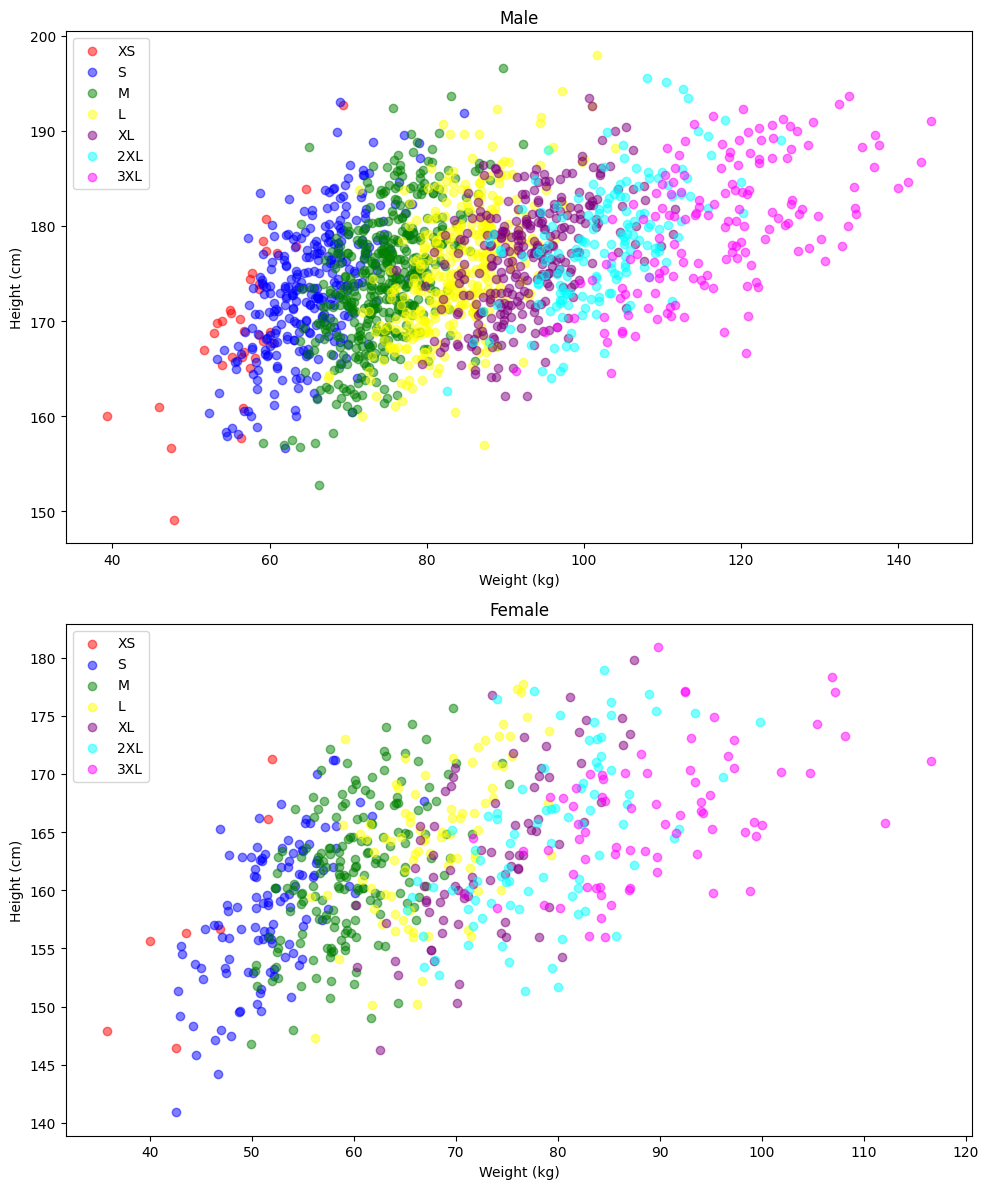

In [23]:
import matplotlib.pyplot as plt


# First let us define a dict to match a t-shirt size to a color
colors = {
    'XS': 'red',
    'S': 'blue',
    'M': 'green',
    'L': 'yellow',
    'XL': 'purple',
    '2XL': 'cyan',
    '3XL': 'magenta'
}

male_dataset = pd.read_csv('./data/male_sized.csv')
female_dataset = pd.read_csv('./data/female_sized.csv')
# For male_dataset
male_dataset.loc[:, 'stature'] = male_dataset['stature'] / 10
male_dataset.loc[:, 'weightkg'] = male_dataset['weightkg'] / 10

# For female_dataset
female_dataset.loc[:, 'stature'] = female_dataset['stature'] / 10
female_dataset.loc[:, 'weightkg'] = female_dataset['weightkg'] / 10

# Create plots for each gender
fig, axes = plt.subplots(nrows=2, figsize=(10, 12))

for ax, gender_data, gender in zip(axes, [male_dataset, female_dataset], ["Male", "Female"]):
    for size, color in colors.items():
        # Filter data by size
        size_data = gender_data[gender_data["t-shirt size"] == size]

        # Plot data
        ax.scatter(size_data["weightkg"], size_data["stature"], c=color, label=size, alpha=0.5)

    ax.set_title(gender)
    ax.set_xlabel("Weight (kg)")
    ax.set_ylabel("Height (cm)")
    # legend = to identify each t-shirt size
    ax.legend()

plt.tight_layout()
plt.show()

Test Scikit-learn

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # one part for training, second part for testing

male_X = male_dataset.drop(columns=['chestcircumference', 'biacromialbreadth', 't-shirt size'])
male_y = male_dataset['t-shirt size']
female_X = female_dataset.drop(columns=['chestcircumference', 'biacromialbreadth', 't-shirt size'])
female_y = female_dataset['t-shirt size']

male_X_train, male_X_test, male_y_train, male_y_test = train_test_split(male_X, male_y, test_size=0.2, random_state=42)


sk_clf = KNeighborsClassifier()
sk_clf.fit(male_X_train, male_y_train)


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [40]:
sc=StandardScaler()
male_X_train=sc.fit_transform(male_X_train)
male_X_train=sc.transform(male_X_test)



In [41]:
predictions = sk_clf.predict(male_X_test)

predictions

array(['L', 'M', 'M', 'S', 'M', 'M', 'M', 'L', 'XS', 'XL', 'L', '3XL',
       'XL', 'L', 'XL', 'S', 'S', '3XL', 'L', 'XL', '2XL', 'S', 'M', 'M',
       'M', 'M', 'M', 'XL', 'S', 'M', 'M', 'M', 'S', 'M', 'XL', 'S', 'L',
       'L', 'M', 'M', '2XL', 'L', '3XL', 'L', 'L', 'XS', 'M', 'M', 'M',
       'XL', 'XL', 'XL', 'XL', 'M', 'L', 'S', 'M', '3XL', 'L', 'S', '2XL',
       '2XL', 'M', '2XL', 'S', 'L', 'XL', '3XL', 'S', 'S', 'L', 'M', 'L',
       'M', '3XL', 'L', 'S', 'XL', 'M', 'S', 'XS', 'S', 'M', 'XL', 'L',
       'S', 'L', 'L', 'S', 'S', 'S', 'L', 'XL', '2XL', '2XL', 'L', '2XL',
       'XL', 'M', 'L', 'L', 'L', 'S', 'M', 'M', 'XL', 'XL', '3XL', 'S',
       'S', '3XL', '2XL', 'XL', 'L', 'L', 'M', '3XL', 'L', 'S', 'M', 'M',
       '3XL', 'S', '2XL', 'M', 'XL', 'S', 'S', 'S', 'M', 'S', 'S', 'XL',
       'L', 'S', 'S', '3XL', 'M', '2XL', 'XL', 'S', 'XL', 'S', 'S', 'L',
       'M', 'S', 'S', 'M', 'L', 'S', 'L', 'S', 'L', 'L', 'M', 'M', 'XL',
       'XL', 'S', 'M', 'M', 'L', 'S', 'L', 'M', '

In [42]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(male_y_test, predictions)


accuracy

0.6482558139534884